### Prediksi Harga Rumah di Kabupaten Tangerang
#### Daffa Kaisha Pratama Chandra - 55770
---
##### Import library yang dibutuhkan

In [1]:
# Library dasar
import pandas as pd
import numpy as np
from scipy import stats

# Library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Pre-processing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold

# Machine Learning
from sklearn.linear_model import LinearRegression # Regresi linear
from sklearn.ensemble import RandomForestRegressor # Random forest regressor
from xgboost import XGBRegressor # XGBoost

# Evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Ignore warning
import warnings
warnings.simplefilter('ignore')

---
#### Baca data harga rumah di tangerang
Deskripsi singkat mengenai dataset: <br>
Dataset ini diambil dengan cara <i> web scraping </i> pada situs realoka.com. <br>
Dataset ini masih berupa data mentah sehingga harus di proses terlebih dahulu.<br>
Dataset ini berisi data harga rumah dan spesifikasi rumah di wilayah Kabupaten Tangerang.

In [2]:
# Baca data
rumah = pd.read_csv("rumah_kab_tangerang.csv", engine='pyarrow')
rumah.head()

,nama_rumah,alamat,harga,deskripsi,Tayang Sejak,Luas Tanah,Luas Bangunan,Kamar Tidur,Kamar Mandi,Sertifikat,...,Daya Listrik1,Parkir1,Kolam Renang1,K. Pembantu1,Air PAM1,Balkon1,One Gate1,Pengamanan1,Wilayah,url
0,"New Cluster Puri Jaya, Cluster Maleo, dekat Ko...","Puri Jaya Pasar Kemis Nur Sodik, Tangerang Kab",440.000.000,Deskripsi dan SpesifikasiPuri Jaya adalah PERU...,5 hari yang lalu,60 m2,31 m2,2,1,SHM - Sertifikat Hak Milik,...,2200 VA,1 mobil,1.0,1.0,1.0,1.0,1.0,1.0,Kabupaten Tangerang,https://www.realoka.com/408932-new-cluster-pur...
1,Cluster Tanamera Residence dekat Bandara Soett...,"Jalan Gatot Subroto Tanah Merah Sepatan, Tang...",297.000.000,Deskripsi dan SpesifikasiCLUSTER TANAMERA RESI...,6 hari yang lalu,60 m2,30 m2,2,1,SHM - Sertifikat Hak Milik,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,Kabupaten Tangerang,https://www.realoka.com/410318-cluster-tanamer...
2,Rumah Murah dekat Puspem Bayar 2juta Akad Ruma...,"Jalan Raya Puspem Tigaraksa Matagara, Tangera...",320.400.000,Deskripsi dan SpesifikasiCLUSTER RUMAHKU MATAG...,6 hari yang lalu,60 m2,30 m2,2,1,SHM - Sertifikat Hak Milik,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,Kabupaten Tangerang,https://www.realoka.com/410317-rumah-murah-dek...
3,"Cluster Terbaru Puri, Cluster Maleo, Banyak Pr...","Puri Jaya Pasar Kemis, Tangerang Kab",500.000.000,Deskripsi dan SpesifikasiPuri Jaya Pasar Kemis...,2 minggu yang lalu,60 m2,46 m2,2,2,SHM - Sertifikat Hak Milik,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,Kabupaten Tangerang,https://www.realoka.com/412981-cluster-terbaru...
4,Rumah di Kelapa Dua Serpong 2 Lantai SIAP HUNI,"Kelapa Dua Tangerang, Tangerang Kab",950.000.000,Deskripsi dan Spesifikasi*Rumah mewah 2 lantai...,46 menit yang lalu,88 m2,79 m2,2,2,SHM - Sertifikat Hak Milik,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,Kabupaten Tangerang,https://www.realoka.com/287076-rumah-di-kelapa...


In [3]:
rumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4644 entries, 0 to 4643
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nama_rumah      4644 non-null   object 
 1   alamat          4644 non-null   object 
 2   harga           4644 non-null   object 
 3   deskripsi       4644 non-null   object 
 4   Tayang Sejak    4644 non-null   object 
 5   Luas Tanah      4644 non-null   object 
 6   Luas Bangunan   4644 non-null   object 
 7   Kamar Tidur     4644 non-null   int64  
 8   Kamar Mandi     4644 non-null   int64  
 9   Sertifikat      4644 non-null   object 
 10  Kondisi         4644 non-null   object 
 11  Kelengkapan     4644 non-null   object 
 12  Jumlah Lantai   4644 non-null   int64  
 13  Menghadap       4644 non-null   object 
 14  Daya Listrik    4386 non-null   object 
 15  Parkir          4644 non-null   object 
 16  Kolam Renang    516 non-null    float64
 17  Air PAM         1548 non-null   f

Karena dataset yang diimport masih berupa data mentah, maka akan dilakukan data cleaning terlebih dahulu. Proses data cleaning disini mencakup membuang kolom yang terduplikat dan mengganti nilai NaN pada dataset dengan 0.

In [4]:
# Drop kolom yang tidak duplikat. Kolom pada index 27 - 43
rumah = rumah.iloc[:, list(range(0, 27)) + list(range(45, 47))]
rumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4644 entries, 0 to 4643
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nama_rumah     4644 non-null   object 
 1   alamat         4644 non-null   object 
 2   harga          4644 non-null   object 
 3   deskripsi      4644 non-null   object 
 4   Tayang Sejak   4644 non-null   object 
 5   Luas Tanah     4644 non-null   object 
 6   Luas Bangunan  4644 non-null   object 
 7   Kamar Tidur    4644 non-null   int64  
 8   Kamar Mandi    4644 non-null   int64  
 9   Sertifikat     4644 non-null   object 
 10  Kondisi        4644 non-null   object 
 11  Kelengkapan    4644 non-null   object 
 12  Jumlah Lantai  4644 non-null   int64  
 13  Menghadap      4644 non-null   object 
 14  Daya Listrik   4386 non-null   object 
 15  Parkir         4644 non-null   object 
 16  Kolam Renang   516 non-null    float64
 17  Air PAM        1548 non-null   float64
 18  One Gate

Kolom yang terduplikat berhasil dihapus

In [5]:
# Mengganti nilai NaN dengan 0.
# Cek kolom yang terdapat missing values terlebih dahulu
rumah.isnull().sum()

nama_rumah          0
alamat              0
harga               0
deskripsi           0
Tayang Sejak        0
Luas Tanah          0
Luas Bangunan       0
Kamar Tidur         0
Kamar Mandi         0
Sertifikat          0
Kondisi             0
Kelengkapan         0
Jumlah Lantai       0
Menghadap           0
Daya Listrik      258
Parkir              0
Kolam Renang     4128
Air PAM          3096
One Gate         1806
Pengamanan       1290
AC               3354
K. Pembantu      4128
Alat Dapur       4386
Air Sumur Bor    2838
Balkon           3096
Water Heater     4386
Kitchen Set      4128
Wilayah             0
url                 0
dtype: int64

In [6]:
# List kolom dengan missing values
cols_missing = ['Daya Listrik', 'Kolam Renang', 'Air PAM', 'One Gate', 'Pengamanan', 'AC', 'K. Pembantu', 
                'Alat Dapur', 'Air Sumur Bor', 'Balkon', 'Water Heater', 'Kitchen Set']

# Cek nilai uniknya
for i in cols_missing:
    print(f'Nilai unik pada kolom {i}: {rumah[i].unique()}')


Nilai unik pada kolom Daya Listrik: ['2200 VA' '1300 VA' None '900 VA']
Nilai unik pada kolom Kolam Renang: [ 1. nan]
Nilai unik pada kolom Air PAM: [ 1. nan]
Nilai unik pada kolom One Gate: [ 1. nan]
Nilai unik pada kolom Pengamanan: [ 1. nan]
Nilai unik pada kolom AC: [nan  1.]
Nilai unik pada kolom K. Pembantu: [nan  1.]
Nilai unik pada kolom Alat Dapur: [nan  1.]
Nilai unik pada kolom Air Sumur Bor: [nan  1.]
Nilai unik pada kolom Balkon: [nan  1.]
Nilai unik pada kolom Water Heater: [nan  1.]
Nilai unik pada kolom Kitchen Set: [nan  1.]


In [7]:
# Ubah nilai None pada kolom Daya Listrik menjadi Lainnya
rumah['Daya Listrik'] = rumah['Daya Listrik'].fillna('Lainnya')
rumah['Daya Listrik'].unique()

array(['2200 VA', '1300 VA', 'Lainnya', '900 VA'], dtype=object)

In [8]:
# Ubah nilai spesifikasi Nan menjadi 0
spec_cols_missing = ['Kolam Renang', 'Air PAM', 'One Gate', 'Pengamanan', 'AC', 'K. Pembantu', 
                'Alat Dapur', 'Air Sumur Bor', 'Balkon', 'Water Heater', 'Kitchen Set']

for index in spec_cols_missing:
    rumah[index] = rumah[index].fillna(0)

# Cek missing values lagi
rumah.isnull().sum()

nama_rumah       0
alamat           0
harga            0
deskripsi        0
Tayang Sejak     0
Luas Tanah       0
Luas Bangunan    0
Kamar Tidur      0
Kamar Mandi      0
Sertifikat       0
Kondisi          0
Kelengkapan      0
Jumlah Lantai    0
Menghadap        0
Daya Listrik     0
Parkir           0
Kolam Renang     0
Air PAM          0
One Gate         0
Pengamanan       0
AC               0
K. Pembantu      0
Alat Dapur       0
Air Sumur Bor    0
Balkon           0
Water Heater     0
Kitchen Set      0
Wilayah          0
url              0
dtype: int64

In [9]:
# Cek informasi dari data rumah yang siap pakai
rumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4644 entries, 0 to 4643
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nama_rumah     4644 non-null   object 
 1   alamat         4644 non-null   object 
 2   harga          4644 non-null   object 
 3   deskripsi      4644 non-null   object 
 4   Tayang Sejak   4644 non-null   object 
 5   Luas Tanah     4644 non-null   object 
 6   Luas Bangunan  4644 non-null   object 
 7   Kamar Tidur    4644 non-null   int64  
 8   Kamar Mandi    4644 non-null   int64  
 9   Sertifikat     4644 non-null   object 
 10  Kondisi        4644 non-null   object 
 11  Kelengkapan    4644 non-null   object 
 12  Jumlah Lantai  4644 non-null   int64  
 13  Menghadap      4644 non-null   object 
 14  Daya Listrik   4644 non-null   object 
 15  Parkir         4644 non-null   object 
 16  Kolam Renang   4644 non-null   float64
 17  Air PAM        4644 non-null   float64
 18  One Gate

In [10]:
print(f"Dataset rumah terdiri atas {rumah.shape[1]} kolom dan {rumah.shape[0]} baris.")

Dataset rumah terdiri atas 29 kolom dan 4644 baris.


In [11]:
# Ubah kolom harga, Luas Tanah, Luas Bangunan kedalam tipe data numerik (integer)
rumah['harga'] = pd.to_numeric(rumah['harga'].str.replace('.', ''))
rumah['Luas Bangunan'] = pd.to_numeric(rumah['Luas Bangunan'].str.replace(' m2', ''))
rumah['Luas Tanah'] = pd.to_numeric(rumah['Luas Tanah'].str.replace(' m2', ''))
rumah['Parkir'] = rumah['Parkir'].str.replace('-', 'Lainnya')
rumah['Menghadap'] = rumah['Menghadap'].str.replace('-', 'Lainnya')

---
#### Exploratory Data Analysis
Tahap ini dilakukan untuk mencari <i> insights </i> tersembunyi yang ada pada data rumah. <br> <br>
Deskripsi Statistik Sederhana

In [12]:
rumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4644 entries, 0 to 4643
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nama_rumah     4644 non-null   object 
 1   alamat         4644 non-null   object 
 2   harga          4644 non-null   int64  
 3   deskripsi      4644 non-null   object 
 4   Tayang Sejak   4644 non-null   object 
 5   Luas Tanah     4644 non-null   int64  
 6   Luas Bangunan  4644 non-null   int64  
 7   Kamar Tidur    4644 non-null   int64  
 8   Kamar Mandi    4644 non-null   int64  
 9   Sertifikat     4644 non-null   object 
 10  Kondisi        4644 non-null   object 
 11  Kelengkapan    4644 non-null   object 
 12  Jumlah Lantai  4644 non-null   int64  
 13  Menghadap      4644 non-null   object 
 14  Daya Listrik   4644 non-null   object 
 15  Parkir         4644 non-null   object 
 16  Kolam Renang   4644 non-null   float64
 17  Air PAM        4644 non-null   float64
 18  One Gate

In [13]:
# Pilih kolom dengan tipe data numerik
numeric_columns = rumah.select_dtypes(include=['number'])
numeric_columns.describe()

,harga,Luas Tanah,Luas Bangunan,Kamar Tidur,Kamar Mandi,Jumlah Lantai,Kolam Renang,Air PAM,One Gate,Pengamanan,AC,K. Pembantu,Alat Dapur,Air Sumur Bor,Balkon,Water Heater,Kitchen Set
count,4.644000e+03,4644.000000,4644.000000,4644.000000,4644.000000,4644.000000,4644.000000,4644.000000,4644.000000,4644.000000,4644.000000,4644.000000,4644.000000,4644.000000,4644.000000,4644.000000,4644.000000
mean,9.086889e+08,97.333333,59.333333,2.388889,1.388889,1.333333,0.111111,0.333333,0.611111,0.722222,0.277778,0.111111,0.055556,0.388889,0.333333,0.055556,0.111111
std,1.043949e+09,59.620922,35.377999,0.755719,0.755719,0.471455,0.314304,0.471455,0.487551,0.447951,0.447951,0.314304,0.229086,0.487551,0.471455,0.229086,0.314304
min,1.680000e+08,60.000000,30.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.950000e+08,60.000000,31.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.500000e+08,71.000000,48.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.500000e+08,100.000000,79.000000,2.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,5.000000e+09,270.000000,180.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Handling Outliers

Text(0.5, 1.0, 'Outliers pada kolom Harga')

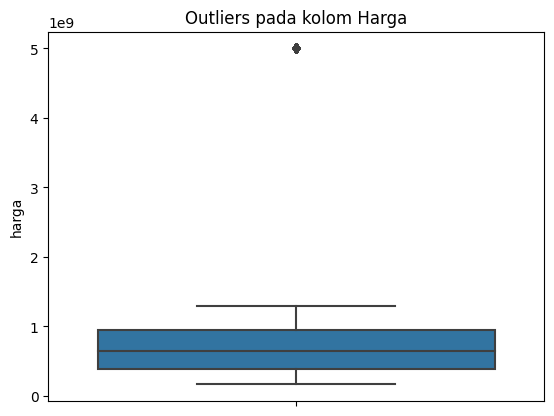

In [14]:
# Cek outliers pada kolom harga
sns.boxplot(y='harga', data=rumah)
plt.title("Outliers pada kolom Harga")

In [15]:
# Handling Outliers dengan Z-score
# Hitung z-score
z_scores = stats.zscore(rumah['harga'])

# Tetapkan threshold untuk mengidentifikasi outliers
threshold = 3.0

# Identifikasi outliers
outliers = rumah[z_scores > threshold]

# Hapus outliers dari DataFrame
rumah = rumah[z_scores <= threshold]

Text(0.5, 1.0, 'Outliers pada kolom Harga')

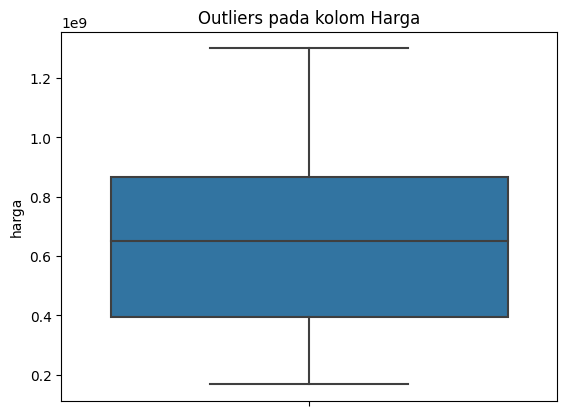

In [16]:
# Cek outliers pada kolom harga
#numeric_columns = rumah.select_dtypes(include=['number'])
sns.boxplot(y='harga', data=rumah)
plt.title("Outliers pada kolom Harga")

In [17]:
print(f"Setelah handling outliers, dataset rumah terdiri atas {rumah.shape[1]} kolom dan {rumah.shape[0]} baris.")

Setelah handling outliers, dataset rumah terdiri atas 29 kolom dan 4386 baris.


Persebaran Harga Rumah

Text(0.5, 1.0, 'Distribusi Harga Rumah di Kabupaten Tangerang')

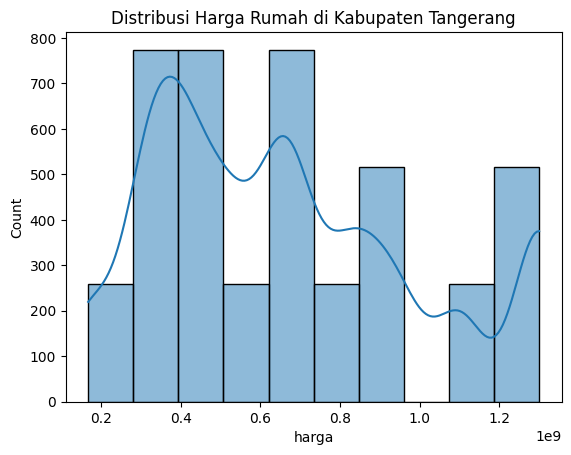

In [18]:
sns.histplot(x='harga', data=rumah, kde=True, bins=10)
plt.title("Distribusi Harga Rumah di Kabupaten Tangerang")

In [19]:
print(f'Skewness dari data harga: {stats.skew(rumah.harga)}')

Skewness dari data harga: 0.5315322386748422


Skewness dari variabel Harga bernilai positif, artinya persebaran data harga rumah bukan merupakan distribusi normal. <br> <br>
Visualisasi Persebaran Spesifikasi Rumah

In [20]:
# Tampung spesifikasi rumah kedalam variabel spec_cols
spec = rumah.iloc[:, 5:27]
spec_cols = spec.columns
spec_cols

Index(['Luas Tanah', 'Luas Bangunan', 'Kamar Tidur', 'Kamar Mandi',
       'Sertifikat', 'Kondisi', 'Kelengkapan', 'Jumlah Lantai', 'Menghadap',
       'Daya Listrik', 'Parkir', 'Kolam Renang', 'Air PAM', 'One Gate',
       'Pengamanan', 'AC', 'K. Pembantu', 'Alat Dapur', 'Air Sumur Bor',
       'Balkon', 'Water Heater', 'Kitchen Set'],
      dtype='object')

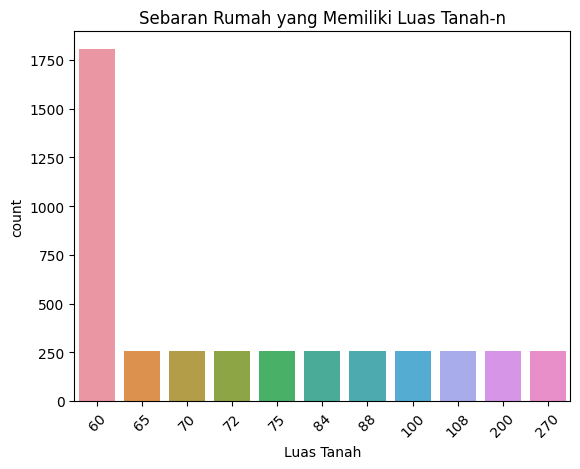

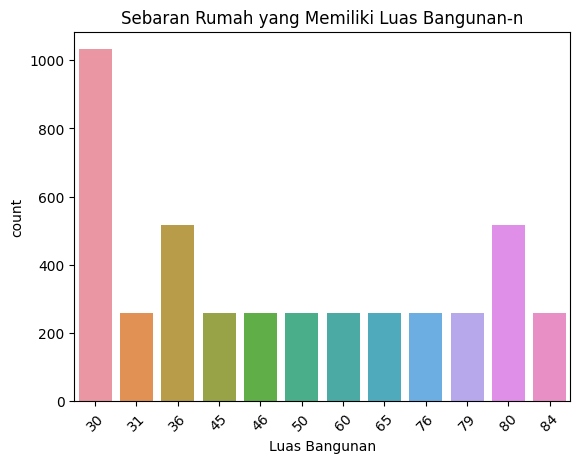

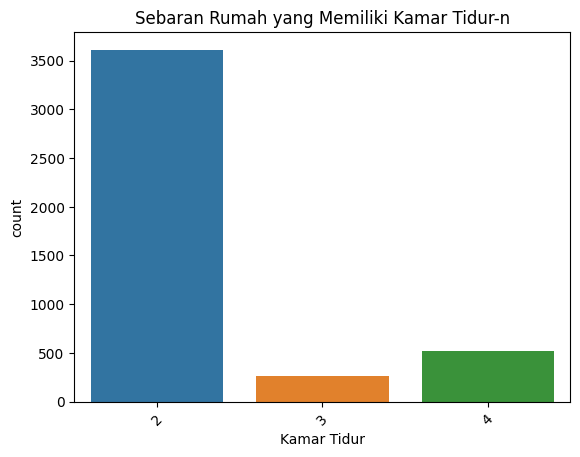

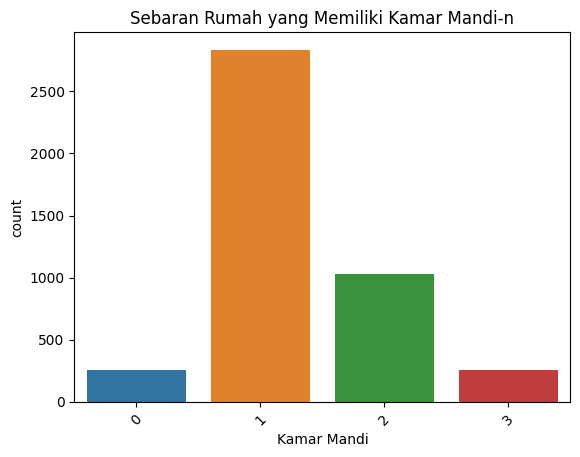

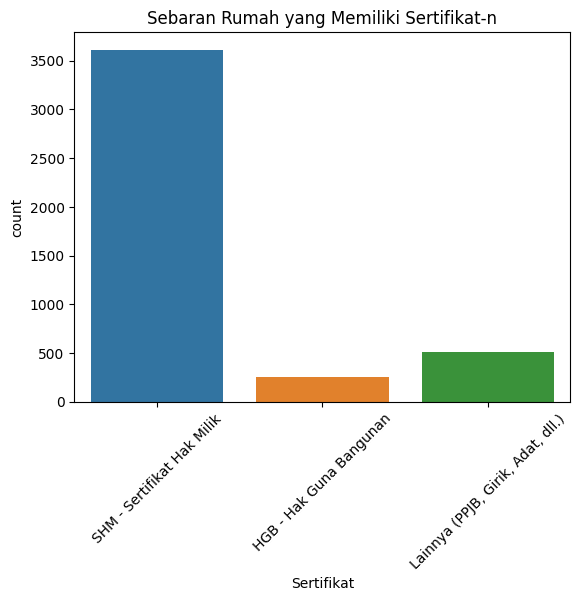

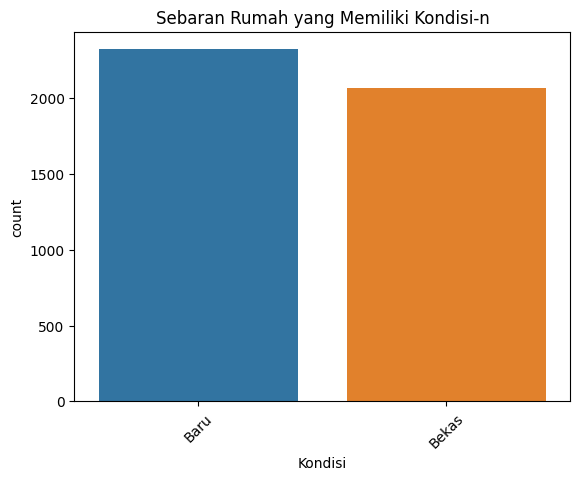

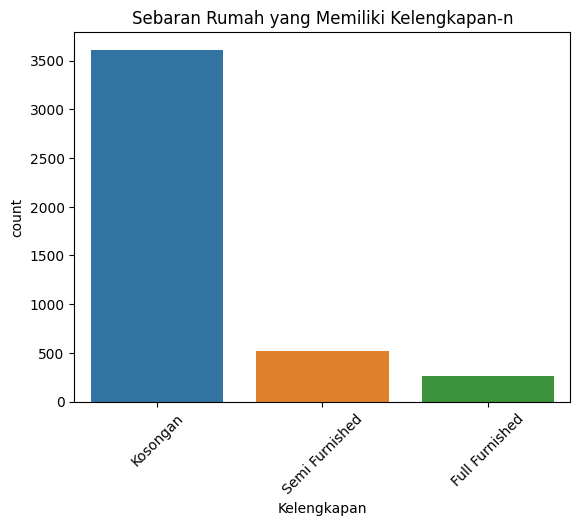

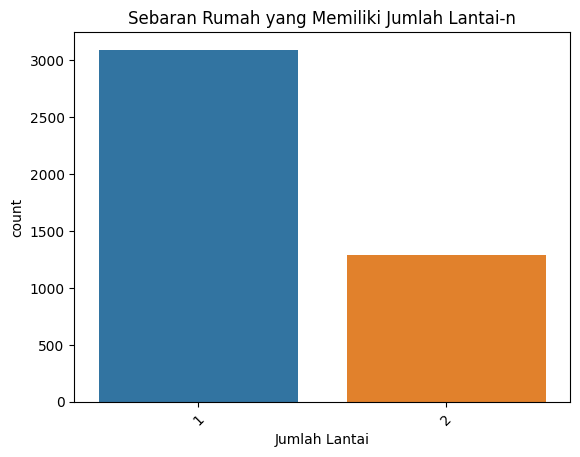

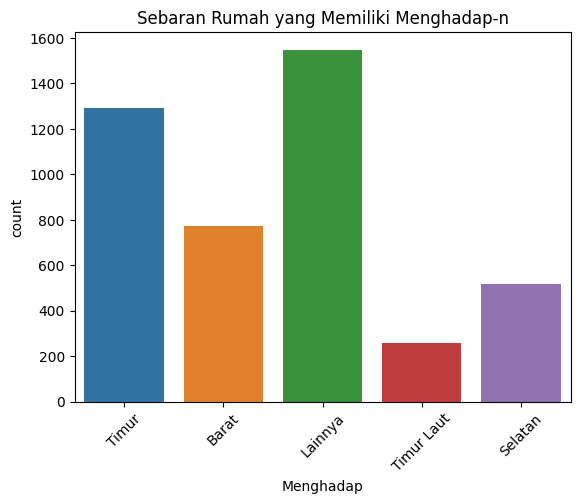

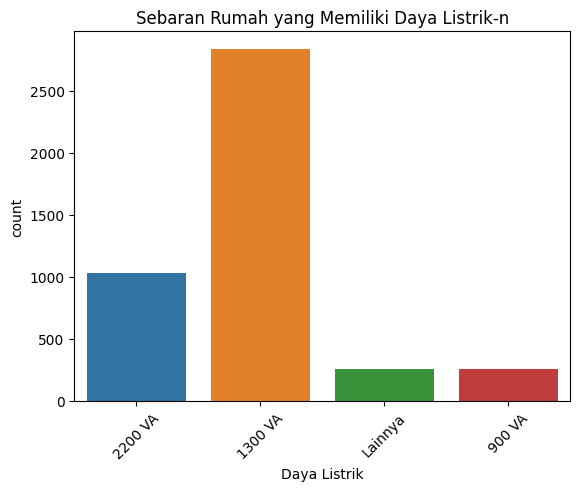

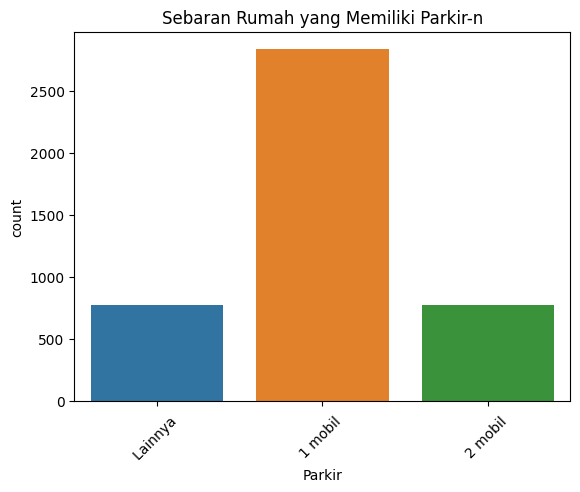

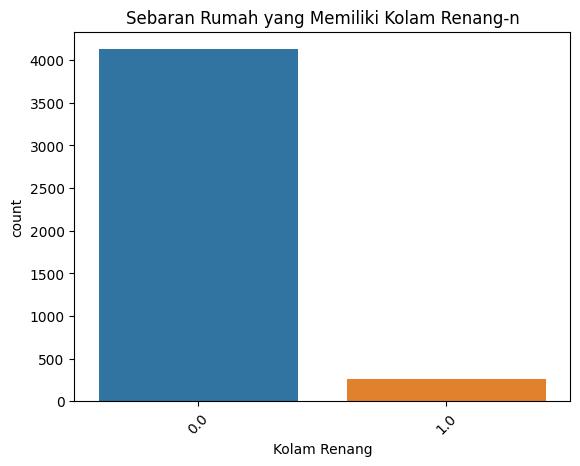

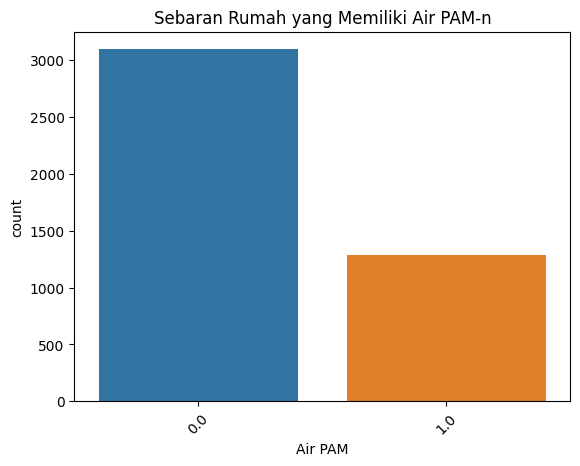

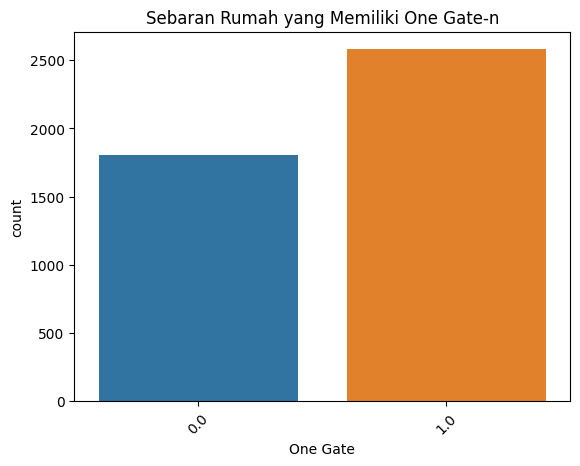

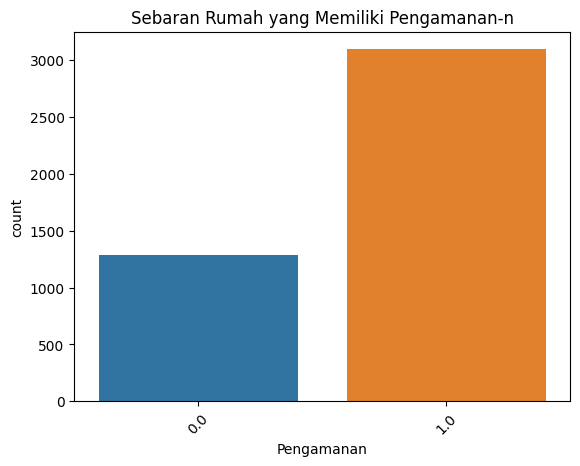

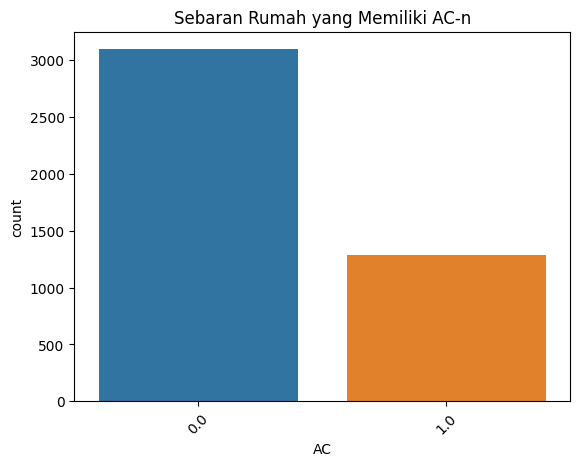

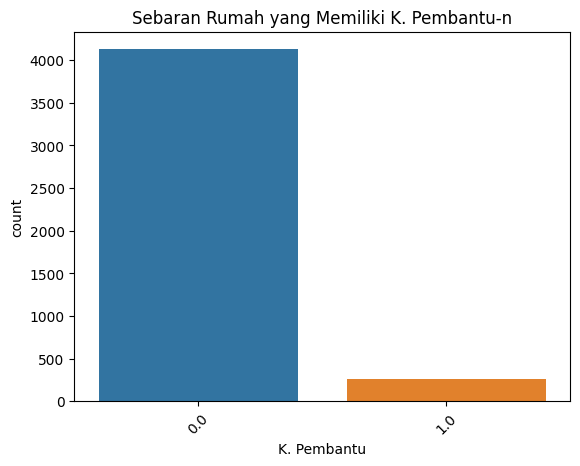

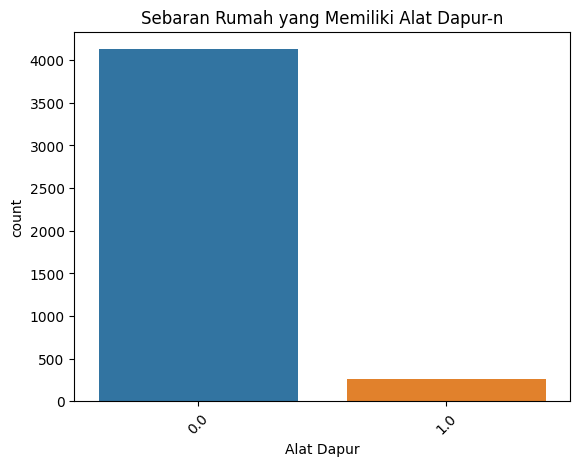

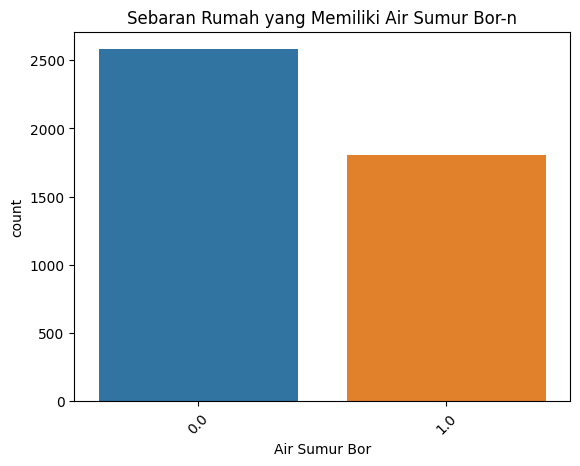

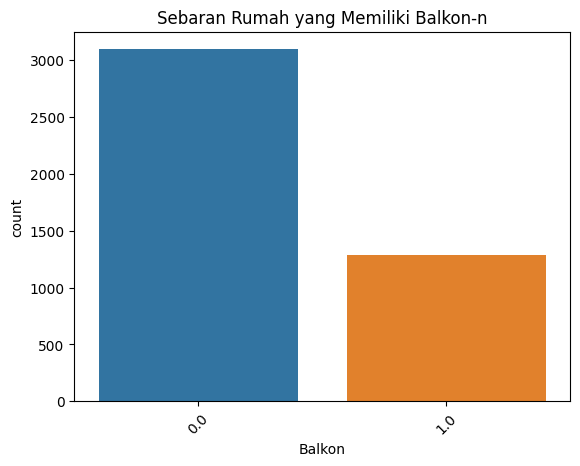

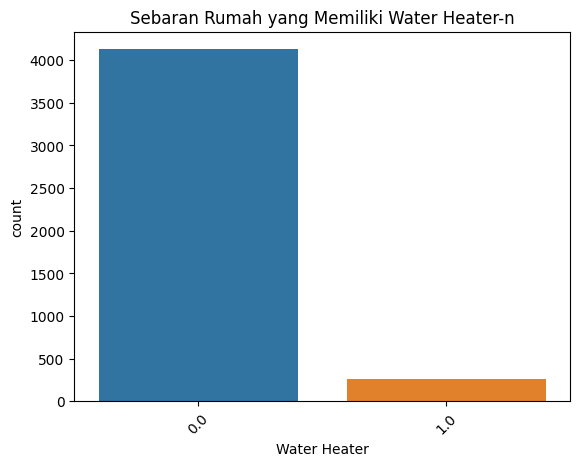

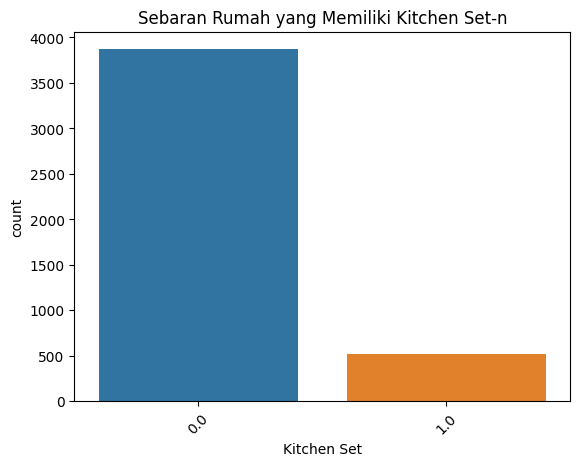

In [21]:
for i in spec_cols:
    sns.countplot(x=i, data=rumah)
    plt.title(f'Sebaran Rumah yang Memiliki {i}-n')
    plt.xticks(rotation=45)
    plt.show()

Mencari berapa lama rumah sudah di iklankan di situs realoka.com (dalam tahun)

In [22]:
# Konvert isi kolom Tayang Sejak kedalam kolom Tahun_Listing
# Definisikan dict time_unit untuk menyimpan data waktu
from datetime import datetime, timedelta

time_units = {
    'tahun': timedelta(days=365),  # Assuming a year is 365 days
    'bulan': timedelta(days=30),   # Assuming a month is 30 days
    'minggu': timedelta(weeks=1),
    'hari': timedelta(days=1),
    'jam': timedelta(hours=1),
    'menit': timedelta(minutes=1)
}

In [23]:
# Fungsi untuk mengubah kolom Tayang Sejak menjadi Tahun Listing
def convert_to_years(time_ago):
    parts = time_ago.split()
    if len(parts) == 4:
        amount = int(parts[0])
        unit = parts[1]
        if unit in time_units:
            total_time_difference = time_units[unit] * amount
            current_datetime = datetime.now()
            target_datetime = current_datetime - total_time_difference
            return target_datetime.year
    return None

rumah['Tahun_Listing'] = rumah['Tayang Sejak'].apply(convert_to_years)
rumah.head()

,nama_rumah,alamat,harga,deskripsi,Tayang Sejak,Luas Tanah,Luas Bangunan,Kamar Tidur,Kamar Mandi,Sertifikat,...,AC,K. Pembantu,Alat Dapur,Air Sumur Bor,Balkon,Water Heater,Kitchen Set,Wilayah,url,Tahun_Listing
0,"New Cluster Puri Jaya, Cluster Maleo, dekat Ko...","Puri Jaya Pasar Kemis Nur Sodik, Tangerang Kab",440000000,Deskripsi dan SpesifikasiPuri Jaya adalah PERU...,5 hari yang lalu,60,31,2,1,SHM - Sertifikat Hak Milik,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Kabupaten Tangerang,https://www.realoka.com/408932-new-cluster-pur...,2023
1,Cluster Tanamera Residence dekat Bandara Soett...,"Jalan Gatot Subroto Tanah Merah Sepatan, Tang...",297000000,Deskripsi dan SpesifikasiCLUSTER TANAMERA RESI...,6 hari yang lalu,60,30,2,1,SHM - Sertifikat Hak Milik,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,Kabupaten Tangerang,https://www.realoka.com/410318-cluster-tanamer...,2023
2,Rumah Murah dekat Puspem Bayar 2juta Akad Ruma...,"Jalan Raya Puspem Tigaraksa Matagara, Tangera...",320400000,Deskripsi dan SpesifikasiCLUSTER RUMAHKU MATAG...,6 hari yang lalu,60,30,2,1,SHM - Sertifikat Hak Milik,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,Kabupaten Tangerang,https://www.realoka.com/410317-rumah-murah-dek...,2023
3,"Cluster Terbaru Puri, Cluster Maleo, Banyak Pr...","Puri Jaya Pasar Kemis, Tangerang Kab",500000000,Deskripsi dan SpesifikasiPuri Jaya Pasar Kemis...,2 minggu yang lalu,60,46,2,2,SHM - Sertifikat Hak Milik,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Kabupaten Tangerang,https://www.realoka.com/412981-cluster-terbaru...,2023
4,Rumah di Kelapa Dua Serpong 2 Lantai SIAP HUNI,"Kelapa Dua Tangerang, Tangerang Kab",950000000,Deskripsi dan Spesifikasi*Rumah mewah 2 lantai...,46 menit yang lalu,88,79,2,2,SHM - Sertifikat Hak Milik,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,Kabupaten Tangerang,https://www.realoka.com/287076-rumah-di-kelapa...,2023


In [25]:
rumah['Tayang Sejak'].unique()

array(['5 hari yang lalu', '6 hari yang lalu', '2 minggu yang lalu',
       '46 menit yang lalu', '2 jam yang lalu', '7 jam yang lalu',
       '18 jam yang lalu', '47 menit yang lalu', '48 menit yang lalu',
       '49 menit yang lalu', '50 menit yang lalu', '3 jam yang lalu',
       '51 menit yang lalu', '52 menit yang lalu', '53 menit yang lalu',
       '54 menit yang lalu', '55 menit yang lalu', '56 menit yang lalu',
       '57 menit yang lalu', '58 menit yang lalu', '59 menit yang lalu',
       '1 jam yang lalu', '19 jam yang lalu', '8 jam yang lalu',
       '4 jam yang lalu'], dtype=object)

Text(0.5, 1.0, 'Tahun Listing Rumah')

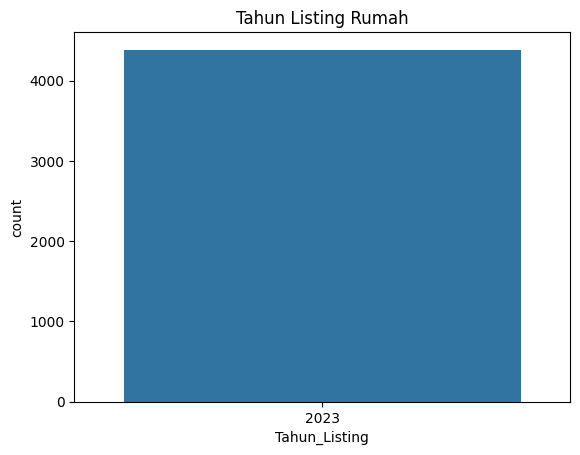

In [24]:
# Plot distribusi Tahun_Listing
sns.countplot(x='Tahun_Listing', data=rumah)
plt.title("Tahun Listing Rumah")

Kesimpulan:
- Outliers dan Missing Values sudah berhasil diatasi
- Persebaran harga rumah tidak mengikuti distribusi normal
- Kebanyakan rumah memiliki luas tanah 60m<sup>2</sup>
- Kebanyakan rumah memiliki luas bangunan 31m<sup>2</sup>
- Kebanyakan rumah memiliki 2 kamar tidur
- Kebanyakan rumah memiliki 1 kamar mandi
- Kebanyakan rumah memiliki SHM - Sertifikat Hak Milik
- Kebanyakan rumah memiliki kondisi baru
- Kebanyakan rumah memiliki kelengkapan kosongan
- Kebanyakan rumah memiliki 1 lantai
- Kebanyakan rumah menghadap ke timur
- Kebanyakan rumah memiliki daya listrik 1300 VA
- Kebanyakan rumah memiliki parkiran untuk 1 mobil
- Kebanyakan rumah memiliki tidak memiliki kolam renang
- Kebanyakan rumah tidak memiliki air pam
- Kebanyakan rumah memiliki one gate
- Kebanyakan rumah memiliki pengamanan
- Kebanyakan rumah tidak memiliki AC
- Kebanyakan rumah tidak memiliki Kamar Pembantu
- Kebanyakan rumah tidak memiliki alat dapur
- Kebanyakan rumah tidak memiliki air sumur bor
- Kebanyakan rumah tidak memiliki balkon
- Kebanyakan rumah tidak memiliki water heater
- Kebanyakan rumah tidak memiliki kitchen set
- Seluruh rumah dilisting di tahun 2023  

---
### Data Pre-processing